<a href="https://colab.research.google.com/github/MableMatovu/MableMatovu/blob/main/Climate_change_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Change

####This notebook serves as an in-depth analysis of climate change trends over a period of 67 years, examining temperature variations against baseline (1951-1980). Leveraging historical climate records, we explore how temperatures have shifted globally and on individual continents, comparing observed changes to established baselines.

### Import Data

In [ ]:
#To connect the notebook to our folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import Libraries

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pprint as pp
import geopandas as gpd
import geopandas as gpd
import matplotlib.pyplot as plt
import json
#import graph_export as ge

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Importing dataset

In [ ]:
file_path ="/content/drive/MyDrive/Le wagon/Project_Climate_Energy/climate_change/climate_change_indicators.csv"
df = pd.read_csv(file_path)

df_nd = pd.read_csv("/content/drive/MyDrive/Le wagon/Project_Climate_Energy/climate_change/df_nd.csv")

### Dataset Exploration

In [ ]:
def export_graph(fig,file_name):
    graph_json = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
    #print(graph_json)
    json_dict = json.loads(graph_json)
    # print(type(json_dict))
    #pp.pprint(json_dict["layout"]["title"]["text"])
    dict={"title":json_dict["layout"]["title"]["text"],"graph":json_dict}
    with open(f"/content/drive/MyDrive/Le wagon/Project_Climate_Energy/{file_name}", "w") as file:
        json.dump(dict,file )

In [ ]:
df.head(3)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688


In [ ]:
df.shape

(225, 72)

#### Using melted function to rearrange columns

In [ ]:
# Melt the DataFrame
df_climate = pd.melt(df, id_vars=['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'])

# Rearrange the columns
rearranged_columns = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'variable', 'value']
df_climate = df_climate[rearranged_columns]

df_climate.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,variable,value
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",F1961,-0.113
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",F1961,0.627
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",F1961,0.164
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",F1961,0.079
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",F1961,0.736


##### Rename column and change dtype

In [ ]:
# Rename the 'variable' column to 'Year'
df_climate= df_climate.rename(columns={'variable': 'Year'})

df_climate= df_climate.rename(columns={'value': 'Temperature'})

### Data Cleaning


In [ ]:
 # Replace 'F' with nothing
df_climate["Year"] = df_climate["Year"].str.replace('F', '')

In [ ]:
# Convert 'Year' column to datetime
df_climate["Year"] = pd.to_datetime(df_climate["Year"], format="%Y")

In [ ]:
df_climate.describe()

,ObjectId,Year,Temperature
count,13950.000000,13950,12460.000000
mean,113.000000,1991-07-02 18:11:36.774193536,0.537771
min,1.000000,1961-01-01 00:00:00,-2.062000
25%,57.000000,1976-01-01 00:00:00,0.068750
50%,113.000000,1991-07-02 12:00:00,0.470000
75%,169.000000,2007-01-01 00:00:00,0.952000
max,225.000000,2022-01-01 00:00:00,3.691000
std,64.953592,NaN,0.655326


##### Merged min and max

In [ ]:
df_climate.isna().sum()

ObjectId                  0
Country                   0
ISO2                    124
ISO3                      0
Indicator                 0
Unit                      0
Source                    0
CTS_Code                  0
CTS_Name                  0
CTS_Full_Descriptor       0
Year                      0
Temperature            1490
dtype: int64

In [ ]:
# Drop ISO2 Column because we dont need it and want to make the work easier. Information is documented in notion.
df_climate.drop(columns=["ISO2","Indicator","Unit","Source","CTS_Code","CTS_Name","CTS_Full_Descriptor"], inplace=True)

In [ ]:
# set the year as index
df_climate=df_climate.set_index("Year")

##### Missing Surface Temperature Data

In [ ]:
df_interp = df_climate.sort_values(["Country","Year"])#.isna().sum()
df_interp.head(3)

,ObjectId,Country,ISO3,Temperature
Year,,,,
1961-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-0.113
1962-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-0.164
1963-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.847


### set 1970 as the start date in the dataframe

In [ ]:
# Filter rows from 1985-01-01 to 2022-01-01 using datetime indexing
df_interp = df_interp.loc['1970-01-01':'2022-01-01']
#df_interp = df_interp[(df_interp['Year'] >= '1970-01-01') & (df_interp['Year'] <= '2022-01-01')]
df_interp

,ObjectId,Country,ISO3,Temperature
Year,,,,
1970-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.813
1971-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.619
1972-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-1.124
1973-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.232
1974-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-0.489
...,...,...,...,...
2018-01-01,225,Zimbabwe,ZWE,0.453
2019-01-01,225,Zimbabwe,ZWE,0.925
2020-01-01,225,Zimbabwe,ZWE,0.389


In [ ]:
# Interpolate missing values in specific columns
columns_to_interpolate = 'Temperature'
df_interp[columns_to_interpolate] = df_interp[columns_to_interpolate].interpolate()

In [ ]:
df_interp.tail(3)

,ObjectId,Country,ISO3,Temperature
Year,,,,
2020-01-01,225,Zimbabwe,ZWE,0.389
2021-01-01,225,Zimbabwe,ZWE,-0.125
2022-01-01,225,Zimbabwe,ZWE,-0.490


1. global avg temperatures have increased over the time and we see the highest increase by 1.72°C in year 2006.



In [ ]:
#visualize after interpolation
fig = px.line(df_interp.head(52).Temperature)
fig.update_layout(title='Average Temperatures over time',
                   xaxis_title='Year',
                   yaxis_title='Temperature')
fig.update_traces(textposition="bottom right")

fig.show()

In [ ]:
import plotly.express as px

fig = px.line(df_interp.head(52), y='Temperature',text = "Temperature")
fig.update_layout(
    title="Average Temperature over Time",
    xaxis_title='Year',
    yaxis_title='Temperature Changes in °C'
)
fig.update_traces(mode='lines+markers')
fig.add_hline(y=0, line_dash="solid", line_color="black", annotation_text="Baseline (1951-1980)")
fig.update_traces(line_color='red',text = df_interp.head(61).Temperature, textposition="bottom right")
fig.update_layout( width=1000, height=600, showlegend=True)

#export_graph(fig,"average_Temperatures_over_time.json")
fig.show()


In [ ]:
df_interp.isna().sum()

ObjectId       0
Country        0
ISO3           0
Temperature    0
dtype: int64

In [ ]:
df_interp.shape

(11925, 4)

In [ ]:
df_interp["Country"].nunique()

225

### Data Visualization

In [ ]:
# Calculate the temperature change for each year and country combination
temperature_change = df_climate.groupby(['Country', 'Year'])['Temperature'].apply(lambda x: x.max() - x.min()).reset_index()

#### Max/Min Temp groupby coutry

In [ ]:
df_interp.head()

,ObjectId,Country,ISO3,Temperature
Year,,,,
1970-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.813
1971-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.619
1972-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-1.124
1973-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.232
1974-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-0.489


In [ ]:
# Calculate the temperature change for each country combination
max_temperature_change = df_interp.groupby(['Country'],as_index=False).max().sort_values(["Temperature"], ascending=False)
max_temperature_change

,Country,ObjectId,ISO3,Temperature
165,Russian Federation,166,RUS,3.691
62,"Estonia, Rep. of",63,EST,3.625
109,Latvia,110,LVA,3.550
18,"Belarus, Rep. of",19,BLR,3.510
115,Lithuania,116,LTU,3.445
...,...,...,...,...
147,Niue,148,NIU,0.767
47,Cook Islands,48,COK,0.675
65,Falkland Islands (Malvinas),66,FLK,0.644
139,"Nauru, Rep. of",140,NRU,0.479


In [ ]:
max_10 = max_temperature_change.head(10)

In [ ]:
fig = px.bar(max_10,x='Temperature',y='Country',color="Country",text_auto=True,
             hover_data=['Country'],
             color_discrete_sequence=px.colors.qualitative.Plotly,
             #height=500,
             #width=800,
             title='Max Temperature Increase in one Year(10 Countries)')
fig.update_layout(xaxis_title='Surface Temperature Change', yaxis_title='Country')
#fig.update_traces(marker_color='rgb(228,26,28)')
# Show plot
#export_graph(fig,"max_temp_increase.json")
fig.show()

In [ ]:
min_temperature_change = df_interp.groupby(['Country'],as_index=False)['Temperature'].min().sort_values(["Temperature"], ascending= True)
min_temperature_change

,Country,Temperature
78,Greenland,-2.062
35,Canada,-1.796
68,Finland,-1.652
168,Saint Pierre and Miquelon,-1.344
9,"Armenia, Rep. of",-1.310
...,...,...
116,Luxembourg,0.325
188,Sudan,0.458
133,Montenegro,0.479
173,"Serbia, Rep. of",0.555


In [ ]:
min_10 = min_temperature_change.head(10)

In [ ]:
fig = px.bar(min_10, x='Temperature', y='Country', color="Country", text_auto=True,
             color_discrete_sequence=px.colors.qualitative.Light24,
             #height=500,
             #width=800,
             title='Max Temperature Decrease in one Year(10 Countries)')
fig.update_layout(xaxis_title='Surface Temperature Change', yaxis_title='Country')
#fig.update_traces(marker_color='rgb(102,166,30)')
# Show plot
#export_graph(fig,"Max_temp_decrease.json")
fig.show()

### Added Continents and showing Temperature by continent


In [ ]:
df_interp.head()


,ObjectId,Country,ISO3,Temperature
Year,,,,
1970-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.813
1971-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.619
1972-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-1.124
1973-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.232
1974-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-0.489


In [ ]:
df_interp1 = df_interp.reset_index()
df_interp1

,Year,ObjectId,Country,ISO3,Temperature
0,1970-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.813
1,1971-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.619
2,1972-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-1.124
3,1973-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.232
4,1974-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-0.489
...,...,...,...,...,...
11920,2018-01-01,225,Zimbabwe,ZWE,0.453
11921,2019-01-01,225,Zimbabwe,ZWE,0.925
11922,2020-01-01,225,Zimbabwe,ZWE,0.389
11923,2021-01-01,225,Zimbabwe,ZWE,-0.125


In [ ]:
# Creating continent Lists and loop throw the Data Set and the Lists to add the right continent name to the countries
Africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Rep.', 'Western Sahara', 'Chad', 'Comoros, Union of the', 'Congo, Dem. Rep. of the', 'Congo, Rep. of', 'Côte d’Ivoire', 'Djibouti', 'Egypt, Arab Rep. of', 'Equatorial Guinea, Rep. of', 'Eritrea, The State of', 'Eswatini, Kingdom of', 'Ethiopia, The Federal Dem. Rep. of', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho, Kingdom of', 'Liberia', 'Libya', 'Madagascar, Rep. of', 'Malawi', 'Mali', 'Mauritania, Islamic Rep. of', 'Mauritius', 'Mayotte', 'Morocco', 'Mozambique, Rep. of', 'Namibia', 'Niger', 'Nigeria', 'Réunion', 'Rwanda', 'Saint Helena', 'São Tomé and Príncipe, Dem. Rep. of', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan, Rep. of', 'Sudan', 'Tanzania, United Rep. of', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

Asia = ['Afghanistan, Islamic Rep. of', 'Armenia, Rep. of', 'Azerbaijan, Rep. of', 'Bahrain, Kingdom of', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China, P.R.: Hong Kong', 'China, P.R.: Macao', 'China, P.R.: Mainland', 'Georgia', 'India', 'Indonesia', 'Iran, Islamic Rep. of', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan, Rep. of', 'Korea, Dem. People\'s Rep. of', 'Korea, Rep. of', 'Kuwait', 'Kyrgyz Rep.', 'Lao People\'s Dem. Rep.', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Rep.', 'Taiwan Province of China', 'Tajikistan, Rep. of', 'Thailand', 'Timor-Leste, Dem. Rep. of', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan, Rep. of', 'Vietnam', 'Yemen, Rep. of']

Europe = ['Albania', 'Andorra, Principality of', 'Austria', 'Belarus, Rep. of', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia, Rep. of', 'Cyprus', 'Czech Rep.', 'Denmark', 'Estonia, Rep. of', 'Faroe Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova, Rep. of', 'Monaco', 'Montenegro', 'Netherlands, The', 'North Macedonia, Republic of ', 'Norway', 'Poland, Rep. of', 'Portugal', 'Romania', 'Russian Federation', 'San Marino, Rep. of', 'Serbia, Rep. of', 'Slovak Rep.', 'Slovenia, Rep. of', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City State']

Americas = ['Antigua and Barbuda', 'Bahamas, The', 'Barbados', 'Belize', 'Canada', 'Cayman Islands', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Rep.', 'El Salvador', 'Grenada', 'Guatemala','Guadeloupe', 'Haiti', 'Honduras', 'Jamaica','Martinique', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis','St. Kitts and Nevis', 'Saint Lucia','St. Lucia', 'Saint Vincent and the Grenadines','St. Vincent and the Grenadines', 'Trinidad and Tobago', 'United States', 'United States Virgin Islands','Greenland','Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela, Rep. Bolivariana de','Falkland Islands (Malvinas)']

Oceania = ['American Samoa', 'Australia', 'Cook Islands', 'Fiji, Rep. of', 'French Polynesia', 'Guam', 'Kiribati', 'Marshall Islands, Rep. of the', 'Micronesia, Federated States of', 'Nauru, Rep. of', 'New Caledonia', 'New Zealand', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Palau, Rep. of', 'Papua New Guinea', 'Pitcairn Islands', 'Samoa', 'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu', 'Wallis and Futuna Islands']

Other = ['Anguilla', 'Aruba, Kingdom of the Netherlands', 'British Virgin Islands', 'Gibraltar', 'Holy See', 'Isle of Man', 'Montserrat', 'Saint Pierre and Miquelon', 'Turks and Caicos Islands', 'West Bank and Gaza']

World = ["World"]


df_interp["Continent"] = ""

for index, row in df_interp1.iterrows():
    if df_interp1.loc[index, "Country"] in Asia:
        df_interp1.loc[index, "Continent"] = "Asia"
    elif df_interp1.loc[index, "Country"] in Africa:
        df_interp1.loc[index, "Continent"] = "Africa"
    elif df_interp1.loc[index, "Country"] in Europe:
        df_interp1.loc[index, "Continent"] = "Europe"
    elif df_interp1.loc[index, "Country"] in Americas:
        df_interp1.loc[index, "Continent"] = "Americas"
    elif df_interp1.loc[index, "Country"] in Oceania:
        df_interp1.loc[index, "Continent"] = "Oceania"
    elif df_interp1.loc[index, "Country"] in World:
        df_interp1.loc[index, "Continent"] = "World"
    elif df_interp1.loc[index, "Country"] in Other:
        df_interp1.loc[index, "Continent"] = "Other"


In [ ]:
df_interp1

,Year,ObjectId,Country,ISO3,Temperature,Continent
0,1970-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.813,Asia
1,1971-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.619,Asia
2,1972-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-1.124,Asia
3,1973-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.232,Asia
4,1974-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-0.489,Asia
...,...,...,...,...,...,...
11920,2018-01-01,225,Zimbabwe,ZWE,0.453,Africa
11921,2019-01-01,225,Zimbabwe,ZWE,0.925,Africa
11922,2020-01-01,225,Zimbabwe,ZWE,0.389,Africa
11923,2021-01-01,225,Zimbabwe,ZWE,-0.125,Africa


In [ ]:
df_interp1['Continent'].value_counts()#.head()

Continent
Africa      2968
Asia        2544
Europe      2438
Americas    2226
Oceania     1219
Other        477
World         53
Name: count, dtype: int64

In [ ]:
df_grouped = df_interp1.groupby(["Continent","Year"])["Temperature"].mean().reset_index()

In [ ]:
# Showing the Temperature Changes for all continents together

fig_by_continent_complete = px.area(df_grouped, x="Year", y="Temperature"
              ,color="Continent"
              ,title="The Evolution of Temperature Change per Continent"
               ,color_discrete_map={"Africa":"deepskyblue","Americas":"gold","Asia":"tomato","Europe":"mediumpurple","Oceania":"limegreen","World":"lightgrey","Other":"yellowgreen"}
              )
fig_by_continent_complete.update_layout(xaxis_title='Year', yaxis_title='Temperature Changes in °C')
#fig_by_continent_complete.update_layout( width=1000, height=600, showlegend=True)

#export_graph(fig_by_continent_complete,"temp_evol.json")
fig_by_continent_complete.show()

In [ ]:
fig_by_continent = px.area(df_grouped, x="Year", y="Temperature"
              ,facet_col="Continent"
              ,facet_col_wrap=2
              ,color="Continent"
              ,hover_name="Continent"
              ,title="The Evolution of Temperature Changes by Continent"

              )
fig_by_continent.update_layout( width=1000, height=600, showlegend=True)

#export_graph(fig_by_continent,"temp_evol_cont.json")
fig_by_continent.show()

In [ ]:
#df_interp1.set_index("Year", inplace=True)

In [ ]:
df_interp1

,Year,ObjectId,Country,ISO3,Temperature,Continent
0,1970-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.813,Asia
1,1971-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.619,Asia
2,1972-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-1.124,Asia
3,1973-01-01,1,"Afghanistan, Islamic Rep. of",AFG,0.232,Asia
4,1974-01-01,1,"Afghanistan, Islamic Rep. of",AFG,-0.489,Asia
...,...,...,...,...,...,...
11920,2018-01-01,225,Zimbabwe,ZWE,0.453,Africa
11921,2019-01-01,225,Zimbabwe,ZWE,0.925,Africa
11922,2020-01-01,225,Zimbabwe,ZWE,0.389,Africa
11923,2021-01-01,225,Zimbabwe,ZWE,-0.125,Africa


### Long-term Climate Trends


In [ ]:
# Created a function to loop through the years
def decade(start_year,end_year):
    dt_start_year = pd.to_datetime(str(start_year))
    dt_end_year = pd.to_datetime(str(end_year))
    mask_time = (df_interp1.Year >= dt_start_year) & (df_interp1.Year <= dt_end_year)
    df_decade = df_interp1[mask_time]
    df_decade= df_decade.groupby(['Continent'],as_index=False).mean(numeric_only=True)
    df_decade["Decade"] = f"{start_year}_{end_year}"

    return df_decade

In [ ]:
# Concatenate DataFrames for each decade
df_decade = decade(1961,1970)

df_decade = pd.concat([df_decade, decade(1971,1980)], ignore_index=True)
df_decade = pd.concat([df_decade, decade(1981,1990)], ignore_index=True)
df_decade = pd.concat([df_decade, decade(1991,2000)], ignore_index=True)
df_decade = pd.concat([df_decade, decade(2001,2010)], ignore_index=True)
df_decade = pd.concat([df_decade, decade(2011,2022)], ignore_index=True)

# Sort the DataFrame by the 'Decade' column
df_decade.sort_values('Decade',inplace=True)

df_decade.head()

,Continent,ObjectId,Temperature,Decade
0,Africa,112.428571,0.310570,1961_1970
1,Americas,100.047619,0.059429,1961_1970
2,Asia,117.312500,0.377863,1961_1970
3,Europe,107.913043,0.311996,1961_1970
4,Oceania,137.000000,0.360210,1961_1970


In [ ]:

df_decade.shape

(42, 4)

1. More changes to climate in the recent decades can be seen in the stendy rise in the temperatures per continent. Having Europe as the leading continent with the most change in base line temperatures, remember most of the countries with maximum temperature change are in Europe.

In [ ]:
df_decade
fig = px.line(data_frame=df_decade, x='Decade', y='Temperature', color='Continent', markers=False,title='Baseline Temperature Change per Continent, decade')
#fig.update_layout( width=1000, height=600)

#export_graph(fig,"temp_decade.json")
fig.show()


## Performing K-means Clustering





In [ ]:
df_new = df_interp[["Country","Temperature"]].reset_index()
df_new.tail()

,Year,Country,Temperature
11920,2018-01-01,Zimbabwe,0.453
11921,2019-01-01,Zimbabwe,0.925
11922,2020-01-01,Zimbabwe,0.389
11923,2021-01-01,Zimbabwe,-0.125
11924,2022-01-01,Zimbabwe,-0.490


In [ ]:
df_new = df_new.pivot(index='Country', columns='Year', values='Temperature')
df_new.head(3)

Year,1970-01-01,1971-01-01,1972-01-01,1973-01-01,1974-01-01,1975-01-01,1976-01-01,1977-01-01,1978-01-01,1979-01-01,...,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",0.813,0.619,-1.124,0.232,-0.489,-0.445,-0.286,0.513,0.129,0.361,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
Albania,-0.106,-0.195,-0.069,-0.288,-0.139,-0.211,-0.683,0.545,-0.814,0.203,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
Algeria,0.116,-0.385,-0.348,-0.015,-0.503,-0.539,-0.782,0.504,0.012,0.654,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688


In [ ]:
melt_df = df_interp1.reset_index().set_index(["Country", "Year"])
melt_df.head(3)

index  ObjectId ISO3  Temperature  \
Country                      Year                                            
Afghanistan, Islamic Rep. of 1970-01-01      0         1  AFG        0.813   
                             1971-01-01      1         1  AFG        0.619   
                             1972-01-01      2         1  AFG       -1.124   

                                        Continent  
Country                      Year                  
Afghanistan, Islamic Rep. of 1970-01-01      Asia  
                             1971-01-01      Asia  
                             1972-01-01      Asia

####Furthermore, we employ machine learning techniques to cluster countries based on similar temperature change patterns. By grouping countries with comparable climate change trajectories, we aim to uncover underlying patterns and similarities, providing insights into regional climate trends and potential correlations.

### Apply the elbow method to find the optimal number of clusters

In [ ]:
# Standardize the surface temperature change data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_new_scaled = scaler.fit_transform(df_new)


# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_new['Cluster'] = kmeans.fit_predict(df_new_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Define the range of cluster numbers to try
list_of_k = np.arange(1, 11)
list_of_k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
list_of_inertias = []
# Loop through each number of clusters
for k in list_of_k:

  # Initialize and fit the KMeans model with the current number of clusters
  kmeans = KMeans(n_init=42, n_clusters=k)
  kmeans.fit(df_new_scaled)

  # Append the WCSS to the list
  list_of_inertias.append(kmeans.inertia_)

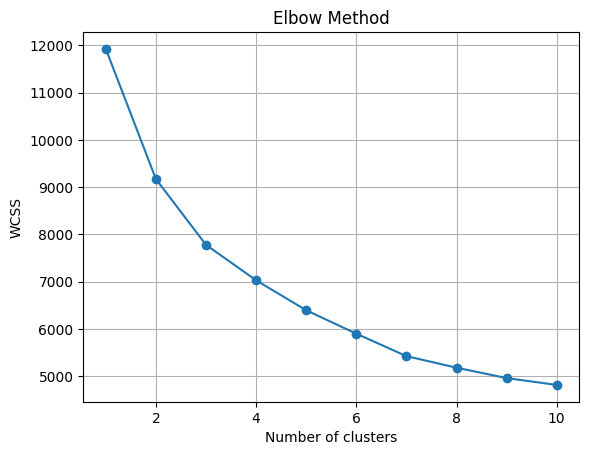

In [ ]:
# Plot the elbow curve
plt.plot(list_of_k, list_of_inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()


### Visualizing Yearly Surface Temperature Change Trends by Cluster

In [ ]:
cluster_df = pd.melt(df_new.reset_index(),id_vars=["Country", "Cluster",]).sort_values(["Country", "Year"])

In [ ]:
# Rename the 'value' column to 'Temperature'
cluster_df= cluster_df.rename(columns={'value': 'Temperature'})

In [ ]:
cluster_df.groupby(["Country","Year"]).mean().reset_index()

,Country,Year,Cluster,Temperature
0,"Afghanistan, Islamic Rep. of",1970-01-01,1.0,0.813
1,"Afghanistan, Islamic Rep. of",1971-01-01,1.0,0.619
2,"Afghanistan, Islamic Rep. of",1972-01-01,1.0,-1.124
3,"Afghanistan, Islamic Rep. of",1973-01-01,1.0,0.232
4,"Afghanistan, Islamic Rep. of",1974-01-01,1.0,-0.489
...,...,...,...,...
11920,Zimbabwe,2018-01-01,2.0,0.453
11921,Zimbabwe,2019-01-01,2.0,0.925
11922,Zimbabwe,2020-01-01,2.0,0.389
11923,Zimbabwe,2021-01-01,2.0,-0.125


In [ ]:
#change Year column to date type
cluster_df["Year"] = pd.to_datetime(cluster_df["Year"])

In [ ]:
cluster_df["new_year"]= cluster_df["Year"].dt.year
cluster_df.tail()

,Country,Cluster,Year,Temperature,new_year
11024,Zimbabwe,2,2018-01-01,0.453,2018
11249,Zimbabwe,2,2019-01-01,0.925,2019
11474,Zimbabwe,2,2020-01-01,0.389,2020
11699,Zimbabwe,2,2021-01-01,-0.125,2021
11924,Zimbabwe,2,2022-01-01,-0.490,2022


In [ ]:
df_iso = df_interp1[["Country","ISO3"]].drop_duplicates().reset_index()
df_iso

,index,Country,ISO3
0,0,"Afghanistan, Islamic Rep. of",AFG
1,53,Albania,ALB
2,106,Algeria,DZA
3,159,American Samoa,ASM
4,212,"Andorra, Principality of",AND
...,...,...,...
220,11660,Western Sahara,ESH
221,11713,World,WLD
222,11766,"Yemen, Rep. of",YEM
223,11819,Zambia,ZMB


In [ ]:
cluster_df.set_index("new_year")#.asfreq("Y")

,Country,Cluster,Year,Temperature
new_year,,,,
1970,"Afghanistan, Islamic Rep. of",1,1970-01-01,0.813
1971,"Afghanistan, Islamic Rep. of",1,1971-01-01,0.619
1972,"Afghanistan, Islamic Rep. of",1,1972-01-01,-1.124
1973,"Afghanistan, Islamic Rep. of",1,1973-01-01,0.232
1974,"Afghanistan, Islamic Rep. of",1,1974-01-01,-0.489
...,...,...,...,...
2018,Zimbabwe,2,2018-01-01,0.453
2019,Zimbabwe,2,2019-01-01,0.925
2020,Zimbabwe,2,2020-01-01,0.389


In [ ]:
cluster_df_grouped = cluster_df.groupby(["Cluster","Year"])[["Temperature","new_year"]].mean().reset_index()

In [ ]:
# Plot the trends for each cluster
fig_by_continent_complete = px.line(cluster_df_grouped, x="Year", y="Temperature"
              ,color="Cluster"
              ,title="'Yearly Surface Temperature Change Trends by Cluster'"

              )
fig_by_continent_complete.update_layout(xaxis_title='Year', yaxis_title='Surface Temperature Change')

#export_graph(fig_by_continent_complete,"temp_cluster.json")
fig_by_continent_complete.show()

In [ ]:
# Group countries by cluster and concatenate them into a DataFrame
cluster_df[cluster_df['Cluster'] == 0]["Country"].unique().tolist()
cluster_df[cluster_df['Cluster'] == 1]["Country"].unique().tolist()
cluster_df[cluster_df['Cluster'] == 2]["Country"].unique().tolist()

['American Samoa',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba, Kingdom of the Netherlands',
 'Australia',
 'Bahamas, The',
 'Bangladesh',
 'Barbados',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China, P.R.: Hong Kong',
 'China, P.R.: Macao',
 'Colombia',
 'Comoros, Union of the',
 'Congo, Dem. Rep. of the',
 'Congo, Rep. of',
 'Cook Islands',
 'Costa Rica',
 'Dominica',
 'Dominican Rep.',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea, Rep. of',
 'Eswatini, Kingdom of',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'Fiji, Rep. of',
 'French Polynesia',
 'Gabon',
 'Ghana',
 'Grenada',
 'Guadeloupe',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Honduras',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Japan',
 'Kenya',
 'Kiribati',
 "Lao People's Dem. Rep.",
 'Lesotho, Kingdom of',
 'Mad

In [ ]:
df_geo = df_new.reset_index()[["Country","Cluster"]]

In [ ]:
# bringing ISO3 into the dataframe
df_geo = df_geo.merge(df_iso, on="Country", how="left")

In [ ]:
#Load world map data while using geopandas to read the world map data from the Natural Earth dataset.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

<ipython-input-115-6c08dc2c3d9a>:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:

df_geo["ISO3"].nunique()

225

In [ ]:
 # merge to geopandas world map
df_map  = world.merge(df_geo, left_on="iso_a3", right_on ="ISO3", how= "left")
df_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Cluster,index,ISO3
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...","Fiji, Rep. of",2.0,3551.0,FJI
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...","Tanzania, United Rep. of",2.0,10388.0,TZA
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Western Sahara,0.0,11660.0,ESH
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,0.0,1855.0,CAN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2.0,11183.0,USA


In [ ]:
#world.merge(df_geo, left_on="name", right_on = "Country", how= "left").plot(column="Cluster")

In [ ]:
import difflib

In [ ]:
fil_df = pd.DataFrame(df_map)

# Function to fill missing country names using difflib
def fill_missing_country(row):
    if pd.isnull(row['Country']):
        closest_match = difflib.get_close_matches(row['name'], fil_df['name'].dropna(), n=1)
        if closest_match:
            return closest_match[0]
    return row['Country']

# Apply the function to fill missing countries
fil_df['Country'] = fil_df.apply(fill_missing_country, axis=1)


In [ ]:
df_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Cluster,index,ISO3
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...","Fiji, Rep. of",2.0,3551.0,FJI
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...","Tanzania, United Rep. of",2.0,10388.0,TZA
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Western Sahara,0.0,11660.0,ESH
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,0.0,1855.0,CAN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2.0,11183.0,USA


In [ ]:
df_map.isna().sum()

pop_est       0
continent     0
name          0
iso_a3        0
gdp_md_est    0
geometry      0
Country       7
Cluster       7
index         7
ISO3          7
dtype: int64

In [ ]:
df_map.shape

(177, 10)

In [ ]:
fil_df.isna().sum()

pop_est       0
continent     0
name          0
iso_a3        0
gdp_md_est    0
geometry      0
Country       0
Cluster       7
index         7
ISO3          7
dtype: int64

<Axes: >

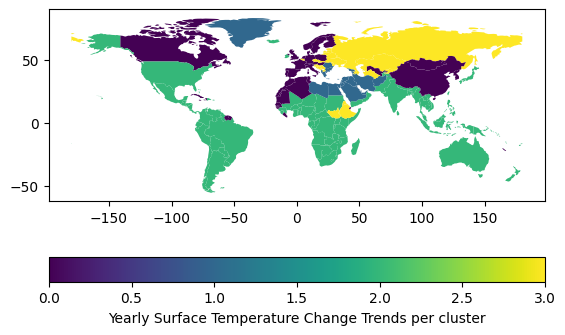

In [ ]:
# Plot the trends for each cluster using geopandas
df_map.plot(column="Cluster",legend=True,
    legend_kwds={"label": "Yearly Surface Temperature Change Trends per cluster", "orientation": "horizontal"},)

####Overall, this notebook offers a comprehensive exploration of climate change dynamics, combining data analysis with machine learning to deepen our understanding of how global temperature shifts manifest across different regions